In [3]:
import torch
import torch.nn as nn
import numpy as np

def get_train_test_dataloader(X= None, Y= None, batch_size=32, split=0.8):
    train_split = int(len(X) * split)
    train_dataset = torch.utils.data.TensorDataset(X[:train_split], Y[:train_split])
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_dataset = torch.utils.data.TensorDataset(X[train_split:], Y[train_split:])
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    print(len(train_dataset), len(test_dataset))
    return train_loader, test_loader

def get_model(model_type, input_channel, output_channel):
    if model_type == "linear":
        return nn.Sequential(
            nn.Linear(input_channel, 8, dtype = torch.float64),
            nn.ReLU(),
            nn.Linear(8, 4, dtype = torch.float64),
            nn.ReLU(),
            nn.Linear(4, output_channel, dtype = torch.float64)
        )
    elif model_type == "lstm":
        return None
    elif model_type == "transformer":
        return None
    

model = get_model("linear", 15, 1)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
X, Y = torch.from_numpy(np.load("./data/sequences.npy")), torch.from_numpy(np.load("./data/labels.npy"))
train_loader, test_loader = get_train_test_dataloader(X= X, Y= Y, batch_size=32, split=0.8)
criterion = nn.MSELoss()


train_loss_curve = []
test_loss_curve = []
for epoch in range(100):
    
    model.train()
    train_loss = 0
    for x, y in train_loader:
        y_pred = model(x).reshape(-1)
        loss = criterion(y_pred, y)
        train_loss += loss.detach().item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    model.eval()    
    test_loss = 0
    with torch.no_grad():
        for x, y in test_loader:
            y_pred = model(x).reshape(-1)
            loss = criterion(y_pred, y)
            test_loss += loss.detach().item()

    train_loss_curve.append(train_loss/len(train_loader))
    test_loss_curve.append(test_loss/len(test_loader))
    print(f"Epoch: {epoch}, Train Loss: {train_loss/len(train_loader)}, Test Loss: {test_loss/len(test_loader)}")

280 70
Epoch: 0, Train Loss: 0.1420014628641516, Test Loss: 0.5069433957482753
Epoch: 1, Train Loss: 0.1297231480117353, Test Loss: 0.47359912888925143
Epoch: 2, Train Loss: 0.1149043828903791, Test Loss: 0.4404977161586469
Epoch: 3, Train Loss: 0.10337620674256524, Test Loss: 0.40526856819221746


Epoch: 4, Train Loss: 0.08933530055718175, Test Loss: 0.36441007215299587
Epoch: 5, Train Loss: 0.07386741801823132, Test Loss: 0.3168361552653818
Epoch: 6, Train Loss: 0.059380435686983396, Test Loss: 0.26365295784773607
Epoch: 7, Train Loss: 0.044554363512534806, Test Loss: 0.2101160113384062
Epoch: 8, Train Loss: 0.03162526883237112, Test Loss: 0.1588742500878435
Epoch: 9, Train Loss: 0.022085939238782267, Test Loss: 0.11511605915589407
Epoch: 10, Train Loss: 0.01598511900649348, Test Loss: 0.08176937104710466
Epoch: 11, Train Loss: 0.013121897490019999, Test Loss: 0.06104217583939877
Epoch: 12, Train Loss: 0.01197539732102655, Test Loss: 0.05040332153936713
Epoch: 13, Train Loss: 0.012037431687529635, Test Loss: 0.04545309307266595
Epoch: 14, Train Loss: 0.011562767011774003, Test Loss: 0.045288643173978294
Epoch: 15, Train Loss: 0.011481617762067863, Test Loss: 0.04594395320415596
Epoch: 16, Train Loss: 0.011108924660561462, Test Loss: 0.047158620732066114
Epoch: 17, Train Loss: 0

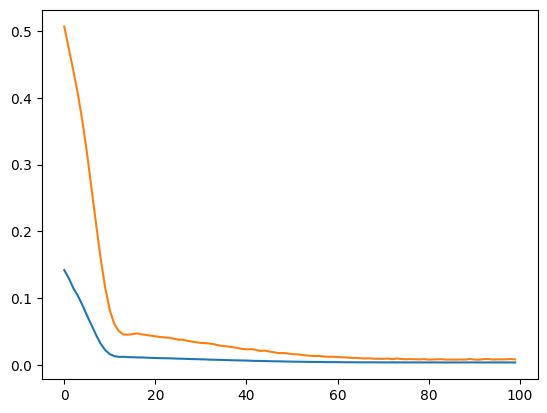

In [4]:
import matplotlib.pyplot as plt
plt.plot(train_loss_curve, label="train")
plt.plot(test_loss_curve, label="test")